In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
plt.style.use('seaborn')

In [23]:
df = pd.DataFrame({'Peso': np.array([18.141,42.404,16.1,13.005,23.583,7.710,17.46,3.855,14.966,4.308,9.524,35.828]),
                    'Altura': np.array([1.087,1.613,0.953,1.003,1.156,0.978,1.092,0.572,0.940,0.597,0.838,1.473]),
                    'Cateter': np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])})
x1 = np.array(df[["Altura"]])
y1 = np.array(df[["Cateter"]])

REGRESSÃO LINEAR SIMPLES - SCIKITLEARN IMPLEMENTATION

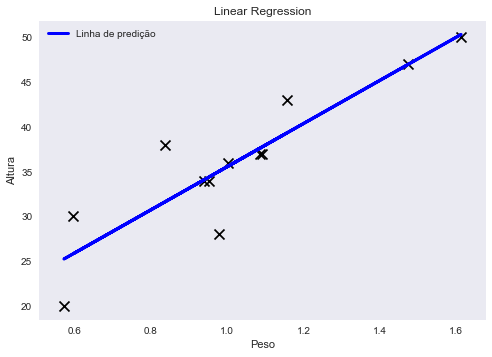

EQUATION: Theta(x) = [[24.08702511]]x + [11.47345142] , R² = 0.7968581624505837


In [24]:
def graf():
    # plt.show()
    print(f"EQUATION: Theta(x) = {a}x + {b} , R² = {R2}")

X = np.array(df[["Altura"]])
y = np.array(df[["Cateter"]])
reg = linear_model.LinearRegression()
reg.fit(X, y)
R2 = reg.score(X, y)
a = reg.coef_
b = reg.intercept_
y_pred = reg.predict(X)

plt.scatter(X, y, color='black', marker ="x", s = 100)
plt.plot(X,y_pred, color='blue', linewidth=3, label ="Linha de predição")
plt.legend()
plt.title("Linear Regression")
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.grid()
plt.show()

graf()

IMPLEMENTAÇÕES


GRADIENTE DESCENDENTE


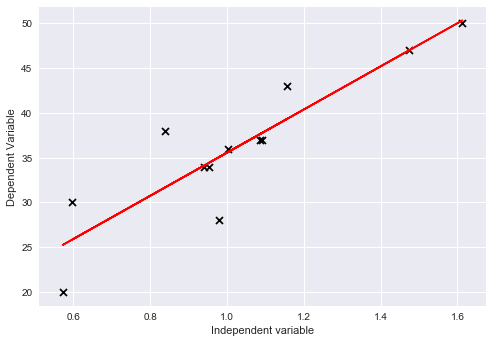

Theta(x) = 24.078302060699745x + 11.482768471454992


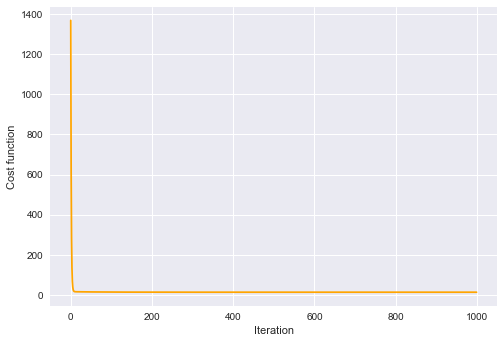

In [25]:
def gradiente_descendente(x, y, Custo = None):
    wo = w = 0
    inter = 1000
    alpha = 0.08 #learning rate
    n = len(x)
    custo = custot = np.array([])

    for t in range(inter):
        y_pred = x*w + wo
        custot = ((1/n) * sum([val**2 for val in (y-y_pred)]))
        custo = np.append(custo, custot) 
        derivada_w = -(2/n)*sum(x*(y-y_pred))
        derivada_wo = -(2/n)*sum(y-y_pred)
        w = w - alpha*derivada_w
        wo = wo - alpha*derivada_wo
#         print(f"Theta(x) = {w}x + {wo}, custo ({custot}),  [{t}]")
    
    plt.scatter(x, y, marker = "x", color = "black")
    plt.plot(x,y_pred, color = "red")
    plt.xlabel("Independent variable")
    plt.ylabel("Dependent Variable")
    plt.show()
    print(f"Theta(x) = {w[-1]}x + {wo[-1]}")
    if Custo:
      plt.plot(np.array([t for t in range(0, inter)]), custo, color = "orange")
      plt.xlabel("Iteration")
      plt.ylabel("Cost function")
      plt.show()
   

gradiente_descendente(x1,y1, Custo = True)

GRADIENTE DESCENDENTE ESTOCASTICO

In [21]:
def gradiente_descendente_estocastico(x, y, Custo = None):
    wo = w = 0
    inter = 1000
    alpha = 0.008  #learning rate
    n = len(x)
    custo = custot = np.array([])
    for t in range(inter):
        y_pred = x*w + wo
        custot = ((1/n) * sum([val**2 for val in (y-y_pred)]))
        custo = np.append(custo, custot) 
        wo = wo + alpha*(y- y_pred)
        w = w + alpha*(y - y_pred)*x
  
    plt.scatter(x, y, marker = "x", color = "black")
    plt.scatter(x,y_pred, color = "red")
    plt.xlabel("Independent variable")
    plt.ylabel("Dependent Variable")
    plt.show()
    print(f"Theta(x) = {w[-1]}x + {wo[-1]}")

    if Custo:
      plt.plot(np.array([t for t in range(0, inter)]), custo, color = "orange")
      plt.xlabel("Iteration")
      plt.ylabel("Cost function")
      plt.show()

gradiente_descendente_estocastico(x1,y1, Custo =True)

NameError: name 'x1' is not defined

REGRESSÃO LINEAR ANALÍTICA


In [4]:
x = np.array([[1 ,2 ,3, 4]])
y = np.array([[2, 4, 6, 8]])

df = pd.DataFrame({'Peso': np.array([18.141,42.404,16.1,13.005,23.583,7.710,17.46,3.855,14.966,4.308,9.524,35.828]),
                    'Altura': np.array([1.087,1.613,0.953,1.003,1.156,0.978,1.092,0.572,0.940,0.597,0.838,1.473]),
                    'Cateter': np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])})
var_1 = df["Peso"] 
var_2 = df["Altura"]

var_prev = df["Cateter"]

Theta(x) = [[24.08702511]]x + [[11.47345142]]


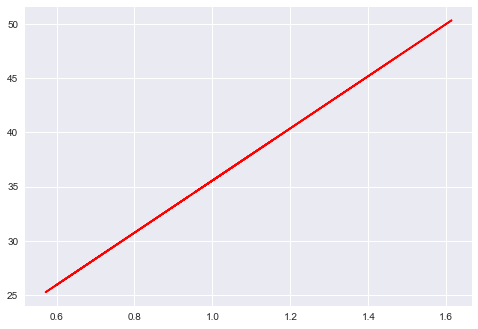

In [19]:
X = np.ones(24).reshape(12,2)
X[:,1] = df["Altura"]
X = np.matrix(X)
y = np.matrix(df["Cateter"]).reshape((12,1))
w = np.linalg.inv((X.T*X))*X.T*y
print(f"Theta(x) = {w[1]}x + {w[0]}")
plt.plot(np.array(X[:,1]), np.array(X*w), color = "red")
plt.show()

REGRESSÃO LINEAR ANALÍTICA - MULTIPLA

In [20]:
def Analitical_Mult_Linreg(x1, x2, var_prev):
    
    X = np.ones(len(x1)*3).reshape(len(x1),3)
    X[:,1] = x1
    X[:,2] = x2
    X = np.matrix(X)
    y = np.matrix(var_prev).reshape((12,1))
    w = np.linalg.inv((X.T*X))*X.T*y
    return f"Theta(x) = {w[2]}x1 + {w[1]}x2 + {w[0]}"

Analitical_Mult_Linreg(var_1, var_2 , var_prev)

'Theta(x) = [[8.80257597]]x1 + [[0.40766255]]x2 + [[20.11432093]]'

Regressão Linear Múltipla
ypred = wo + w1*xi1 + w2xi2

Regra de atualização:
w(t) = w(t-1) + alpha*(1/n)*sum(ei*(t-1)xi)

In [2]:
# def gradiente_descendente_multiplo(x1, x2, var_prev, Custo = None):
#     wo = w1 = w2 = 0
#     inter = 100
#     alpha = 0.08 #learning rate
#     n = len(x1)
#     custo = custot = np.array([])

#     for t in range(inter):
#         y_pred = x1*w1 + x2*w2 + wo
#         custot = ((1/n) * sum([val**2 for val in (var_prev - y_pred)]))
#         custo = np.append(custo, custot) 
#         derivada_w1 = -(2/n)*sum(x1*(var_prev - y_pred))
#         derivada_w2 = -(2/n)*sum(x2*(var_prev - y_pred))
#         derivada_wo = -(2/n)*sum(var_prev - y_pred)
#         w1 = w1 - alpha*derivada_w1
#         w2 = w2 - alpha*derivada_w2
#         wo = wo - alpha*derivada_wo
# #         print(f"Theta(x) = {w1}x1 + {w2}x2 + {wo}, custo ({custot}),  [{t}]")
    
#     plt.scatter(var_1, var_prev , marker = "x", color = "black")
#     plt.scatter(var_2, var_prev, marker = "+", color = "blue")
# #     plt.plot(x,y_pred, color = "red")
# #     plt.xlabel("Independent variable")
# #     plt.ylabel("Dependent Variable")
# #     plt.show()
#     if Custo:
#       plt.plot(np.array([t for t in range(0, inter)]), custo, color = "orange")
#       plt.xlabel("Iteration")
#       plt.ylabel("Cost function")
#       plt.show()
   

# gradiente_descendente_multiplo(var_1, var_2 , var_prev)